In [62]:
import comodoro

Mapa = comodoro.generar_mapa(2)


In [63]:

##Clases para los que generan viajes

#Clase base para los generadores que pueden ser edificaciones o vialidad
class generador():
    def __init__(self, tipo):
        self.tipo = tipo
        
    def GenerarViajes(self, coef):
    #funcion que simula y entrega la generacion de viajes de cada celda cada turno
        viajes = 0
        tiempo = 0
        t1 = comodoro.exponencial(1/coef)
        tiempo = t1
        while tiempo <= 1:
            viajes += 1 
            tiempo += comodoro.exponencial(1/coef)
        return viajes
    def get_inversolambda(self):
        #entrega el inverso de lambda segun el tipo de generador
        if self.tipo == 0:
            return 2
        elif self.tipo == 1:
            return 3
        elif self.tipo >= 2:
            return 1
    
class EdifGen(generador):
#clase que corresponde a las edificaciones que generan viajes

    def __init__(self, fila, columna,tipo):
        self.fila = fila
        self.columna = columna
        super().__init__(tipo)

    def ubicacion_viaje(self, mapa):
        # funcion que recibe el mapa con vialidades y edificicaciones y entrega una tupla que indica donde iniciaria un viaje generado por hogar u ofic
        if self.fila > 0 and mapa[self.fila-1][self.columna] >= 2: 
            return (self.fila-1,self.columna)
        elif self.fila < (len(mapa)-1) and mapa[self.fila+1][self.columna] >= 2:
            return (self.fila+1, self.columna)
        elif self.columna > 0 and mapa[self.fila][self.columna-1] >= 2:
            return (self.fila, self.columna-1)
        elif self.columna < (len(mapa[0])-1) and mapa[self.fila][self.columna+1]>=2:
            return (self.fila, self.columna+1)
        else: 
            return None
        
class VialGen(generador):
    def __init__(self, fila, columna, tipo):
        self.fila = fila
        self.columna = columna
        super().__init__(tipo)
        
    def ubicacion_viaje(self,mapa):
        #misma funcionq que arriba pero con diferente retorno
        return(self.fila,self.columna)
        
    

In [ ]:
##clases para modelar viajes y modo


class ModoTpte():
    #clase modo para determinar la velocidad
    def __init__(self, tipo):
        self.tipo = tipo
        self.velocidad = None

    def det_velocidad(self, vialidad):
        
        if self.tipo == "caminata":
            return 1
        elif self.tipo == "bicicleta":
            if vialidad == 2:
                return 2
            else:
                return 3
        elif self.tipo == "bus":
            if vialidad == 2:
                return 2
            elif vialidad == 3:
                return 4
            else:
                return 5
        elif self.tipo == "auto":
            if vialidad == 2:
                return 3
            elif vialidad == 3:
                return 5
            else:
                return 7


class viaje():
    #clase que contiene la ubicacion actual del viaje, define el modo y la ocupacion y decide la ruta 
    #define la direccion de inicio del viaje y contiene un metodo para mover el viaje en cada iteracion
    def __init__(self, fila, columna, mapa):
        self.fila = fila
        self.columna = columna
        self.mapa = mapa
        self.modo = None
        self.ocupacion = None
        self.ModoClase=None
        self.diractual = None
        self.dist_viajar = None
        self.dirprobar = None
        self.cfila=None
        self.ccol=None
    def eleccion_modo(self):
        Vmodo=comodoro.uniforme(0,100)
        if Vmodo<= 15:
            self.modo = "caminata"
        elif Vmodo>15 and Vmodo<=25:
            self.modo = "bicicleta"
        elif Vmodo>25 and Vmodo<=50:
            self.modo = "auto"
        else:
            self.modo = "bus"
        return self.modo
    
    def set_modo(self):
        self.ModoClase = ModoTpte(self.modo)
        
    def det_ocupacion(self):
        if self.modo == "caminata":
            self.ocupacion = 1
        elif self.modo == "bicicleta":
            self.ocupacion = int(comodoro.uniforme(1,2))
        elif self.modo == "auto":
            self.ocupacion = int(comodoro.uniforme(1,5))
        elif self.modo == "bus":
            self.ocupacion = int(comodoro.uniforme(1,40))

        return self.ocupacion
    def set_direccion_inicio(self, MatrizRuta):
        
        d = comodoro.ruta(MatrizRuta[self.fila][self.columna][0],MatrizRuta[self.fila][self.columna][1],MatrizRuta[self.fila][self.columna][2],MatrizRuta[self.fila][self.columna][3])
        self.diractual = str(d)
        if self.diractual == "a":
            self.dirprobar=0
            self.cfila=1
        if self.diractual == "b":
            self.dirprobar=1
            self.cfila=-1
        if self.diractual=="i":
            self.dirprobar=2
            self.ccol=-1
        if self.diractual=="d":
            self.dirprobar=3
            self.ccol=1
         
    def actualizar_ubicacion(self, fila, columna):
        self.fila = fila
        self.columna = columna
    def veloc_a_distancia(self,velocidad):
        self.dist_viajar = velocidad

#me falto terminar de definir este metodo, era el corazon de la simulacion, deberia decir cuanto avanza y decidir direccion
#contener condiciones para cuando deberia detenerse, las restricciones de los cruces, etc.


#    def avance_viaje(self,Mdirecciones):
#        while self.dist_viajar>0:
#            if Mdirecciones[fila][columna][self.dirprobar] == True:
#                if self.dirprobar == 0 or self.dirprobar ==1:
#                    if Mdirecciones[fila][columna][3] == False and Mdirecciones[fila][columna][2] == False:
#                        self.fila = self.fila + self.cfila
#                        self.dist_viajar-=1
#                    if Mdirecciones[fila][columna][3] == True or Mdirecciones[fila][columna][2] == True:
#                        comodoro.ruta(Mdirecciones[self.fila][self.columna])
#
#                if self.dirprobar ==2 or self.dirprobar==3:
#                    pass

In [64]:
##funciones utiles

def EsGenerador(fila, columna, mapa, tipo):
    #funcion que recibe una posicion un mapa y un tipo y retorna un verdadero si es generador y un falso si no
    if tipo == 0 or tipo == 1:
        if fila > 0 and mapa[fila-1][columna] >= 2: 
            return True
        elif fila < len(mapa) and mapa[fila+1][columna] >= 2:
            return True
        elif columna >0 and mapa[fila][columna-1] >= 2:
            return True
        elif columna < len(mapa[0]) and mapa[fila][columna+1]>=2:
            return True
        else: 
            return False
    if tipo >=2:
        if fila==0 or fila == (len(mapa)-1):
            return True
        if columna == 0 or columna == (len(mapa[0])-1):
            return True
        else:
            return False




def Matriz_vacia_mapa(mapa):
#crea matriz vacia donde voy a ubicar los generadores 
    MatrizVacia = []
    for i in range(len(mapa)):
        MatrizVacia.append([])
        for j in range(len(mapa[i])):
            MatrizVacia[i].append([])
    return MatrizVacia


def Matriz_Generadores(GeneradoresViajes, mapa):
#funcion que recibe una matriz vacia y la llena con una clase de generadores 
#Cambiar lo que se agrega cuando es generador a una clase generadora
    
    for fila in range(len(mapa)):
        for celda in range(len(mapa[fila])):
            
            if EsGenerador(fila, celda, mapa, mapa[fila][celda])==True:
                if mapa[fila][celda] == 0 or mapa[fila][celda]==1:
                    GeneradoresViajes[fila][celda] = EdifGen(fila,celda,mapa[fila][celda])
                elif mapa[fila][celda]>=2:
                    GeneradoresViajes[fila][celda] = VialGen(fila,celda,mapa[fila][celda])
                
            else:
                GeneradoresViajes[fila][celda]= -1


            

In [57]:


def Matriz_direcciones(mapa,mvacia):
    #entrega una matriz con las direcciones posibles en cada celda del mapa con el formato que necesita la funcion comodoro
    for fila in range(len(mapa)):
        for celda in range(len(mapa[fila])):
            if mapa[fila][celda]>= 2:
                #arriba
                if fila > 0 and (mapa[fila-1][celda])>=2:
                    mvacia[fila][celda].append(True)
                elif fila==0 or mapa[fila-1][celda]<2:
                    mvacia[fila][celda].append(False)
                #abajo
                if fila <(len(mapa)-1) and mapa[fila+1][celda]>=2:
                    mvacia[fila][celda].append(True)
                elif fila == (len(mapa)-1) or mapa[fila+1][celda]<2:
                    mvacia[fila][celda].append(False)
                #izquierda
                if celda > 0 and mapa[fila][celda-1]>=2:
                    mvacia[fila][celda].append(True)
                elif celda ==0 or mapa[fila][celda-1]<2:
                    mvacia[fila][celda].append(False)
                #derecha
                if celda < (len(mapa[fila])-1) and (mapa[fila][celda+1])>=2:
                    mvacia[fila][celda].append(True)
                elif celda == (len(mapa[fila])-1) or mapa[fila][celda+1]<2:
                    mvacia[fila][celda].append(False)
            else:
                mvacia[fila][celda] = [False, False, False, False]
        
def actualizar_viajes(generadores, viajes):
    #funcion que almacena la cantidad de viajes generados en la matriz viajes
    for fila in range(len(generadores)):
        for celda in range(len(generadores[0])):
            if generadores[fila][celda]!=-1:
                viajes[fila][celda] = generadores[fila][celda].GenerarViajes(generadores[fila][celda].get_inversolambda())
            else: 
                viajes[fila][celda] = 0
                
def ubicar_viajes(ViajesTurno,GenViajes,Mapa,InicioViajes):
    #funcion que ubica los viajes generados en su lugar de inicio
    for fila in range(len(ViajesTurno)):
        for celda in range(len(ViajesTurno[0])):
            if ViajesTurno[fila][celda]>0:
                ubicacion = GenViajes[fila][celda].ubicacion_viaje(Mapa)
                InicioViajes[ubicacion[0]][ubicacion[1]] = ViajesTurno[fila][celda]

    for fila in range(len(ViajesTurno)):
        for celda in range(len(ViajesTurno[0])):
            if InicioViajes[fila][celda]==[]:
                InicioViajes[fila][celda]=0

def ViajesNuevos(InicioViajes,Viajes):
    #funcion que almacena cada viaje generado en una matriz con su respectiva ubicacion pero como una 
    #instancia de la clase viaje
    for fila in range(len(InicioViajes)):
        for celda in range(len(InicioViajes[0])):
            if InicioViajes[fila][celda]>0:
                a = InicioViajes[fila][celda]
                while a > 0:
                    Viajes[fila][celda].append(viaje(fila, celda, Mapa))
                    a-=1

def CaracViajes(Viajes,MatDirecciones):
    #solo para las celdas con viajes, setea las caracteristicas en cada instancia de la clase
    for fila in range(len(Viajes)):
        for celda in range(len(Viajes[0])):
            if Viajes[fila][celda]!= []:
                for item in range(len(Viajes[fila][celda])):
                    Viajes[fila][celda][item].eleccion_modo()
                    Viajes[fila][celda][item].det_ocupacion()
                    Viajes[fila][celda][item].set_modo()
                    Viajes[fila][celda][item].actualizar_ubicacion(fila,celda)
                    Viajes[fila][celda][item].set_direccion_inicio(MatDirecciones)

def AgregarViajesNuevos(ViajesN, ViajesAntiguos):
    #funcion que suma a los viajes de la iteracion anterior los viajes nuevos de la iteracion actual
    for fila in range(len(ViajesAntiguos)):
        for celda in range(len(ViajesAntiguos[0])):
            if ViajesN[fila][celda]!=[]:
                a = len(ViajesN[fila][celda])
                i = 0
                while a >0:
                    ViajesAntiguos[fila][celda].append(ViajesN[fila][celda][i])
                    i+=1
                    a-=1
    
def calcular_velocidades(ViajesActuales):
    #funcion que calcula y setea (dentro de la clase) velocidades para cada viaje
    for fila in range(len(ViajesActuales)):
        for celda in range(len(ViajesActuales[0])):
            for i in range(len(ViajesActuales[fila][celda])):
                veloc = ModoTpte(ViajesActuales[fila][celda][i].modo).det_velocidad(Mapa[fila][celda])
                ViajesActuales[fila][celda][i].veloc_a_distancia(veloc)
                
#def avanzar(ViajesActuales):
#    for fila in range(len(ViajesActuales)):
#        for celda in range(len(ViajesActuales[0]))
def Matriz_Personas(Viajes,Mpersonas):
    #funcion que genera la matriz de personas necesaria para graficar el mapa
    for fila in range(len(Viajes)):
        for celda in range(len(Viajes[0])):
            pers = 0
            if Viajes[fila][celda]!=[]:
                for i in range(len(Viajes[fila][celda])):
                    pers += int(Viajes[fila][celda][i].ocupacion)
            Mpersonas[fila][celda] = pers
                    
                    
      

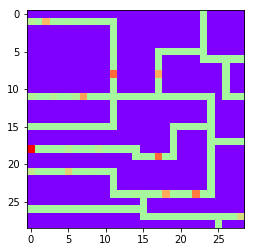

In [65]:
####################Simulacion###########################
Mapa = comodoro.generar_mapa(2)
Mpers = Matriz_vacia_mapa(Mapa)
ViajesActuales = Matriz_vacia_mapa(Mapa)
Mdirecciones = Matriz_vacia_mapa(Mapa)
Matriz_direcciones(Mapa,Mdirecciones)


#determinar celdas que pueden generar viaje y guardarlas en una matriz como clase VialGen o EdifGen

GenViajes = Matriz_vacia_mapa(Mapa)
Matriz_Generadores(GenViajes, Mapa)


t = 0

#A continuacion se almacenan los viajes generados en el turno actual
ViajesTurno = Matriz_vacia_mapa(Mapa)
actualizar_viajes(GenViajes,ViajesTurno)

#Indica el lugar donde inicia cada viaje
InicioViajes = Matriz_vacia_mapa(Mapa)
ubicar_viajes(ViajesTurno,GenViajes,Mapa,InicioViajes)

#asigna una clase viaje a cada viaje en su punto de inicio
Viajes = Matriz_vacia_mapa(Mapa)
ViajesNuevos(InicioViajes,Viajes) 

#se agrega el modo, la ocupacion y direccion inicial (caracteristicas) a los viajes nuevos
CaracViajes(Viajes, Mdirecciones)

AgregarViajesNuevos(Viajes, ViajesActuales) 
#calcular personas por celda e imprimir el mapa
Matriz_Personas(ViajesActuales,Mpers)
comodoro.imprimir_mapa(Mpers,Mapa)

#Ahora empiezan a moverse (o se siguen moviendo los viejos)
#Ahora se debe calcular la velocidad de cada viaje
calcular_velocidades(ViajesActuales)

#me falto terminar un metodo crucial para poder implementar la simulacion y comenzar a iterar
